In [2]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
# Access shared folder 
two_cluster = '/content/drive/My Drive/bitcoin_price_prediction/two_cluster_tweets_data.csv' #Make sure you create a shortcut of this file from the SHARED folder on your personal drive
two_cluster = pd.read_csv(two_cluster) # Two-cluster Twitter data


In [5]:
# Access shared folder 
three_cluster = '/content/drive/My Drive/bitcoin_price_prediction/three_cluster_tweets_data.csv' #Make sure you create a shortcut of this file from the SHARED folder on your personal drive
three_cluster = pd.read_csv(three_cluster) # Three-cluster Twitter data


In [6]:
two_cluster.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
0,0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,bitcoin,Twitter Web App,False,135,2021-02-10,"['blue', 'ridge', 'bank', 'share', 'halt', 'ny...",blue ridge bank share halt nyse bitcoin atm an...,1
1,1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",thursday btc wallet security,Twitter for Android,False,140,2021-02-10,"['today', ""'"", 'thursday', 'take', 'friend', '...",today ' thursday take friend btc wallet securi...,1
2,2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,False,2021-02-10 23:54:48,"guys evening, i have read this article about b...",NaN,Twitter Web App,False,136,2021-02-10,"['guy', 'even', 'read', 'article', 'btc', 'wou...",guy even read article btc would like share,1
3,3,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,False,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...,btc,Twitter Web App,False,140,2021-02-10,"['network', 'secure', 'node', 'today', 'soon',...",network secure node today soon biggest bear re...,1
4,4,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,💹 trade #crypto on #binance \n\n📌 enjoy #cashb...,crypto binance cashback,Twitter Web App,False,136,2021-02-10,"['trade', 'crypto', 'binance', 'enjoy', 'cashb...",trade crypto binance enjoy cashback trade fee ...,-1


In [7]:
three_cluster.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,text_length,tweet_yyyymmdd,clean_tweet,cleaned_tweet,sentiment
0,0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:59:04,blue ridge bank shares halted by nyse after #b...,bitcoin,Twitter Web App,False,135,2021-02-10,"['blue', 'ridge', 'bank', 'share', 'halt', 'ny...",blue ridge bank share halt nyse bitcoin atm an...,0
1,1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,"😎 today, that's this #thursday, we will do a ""...",thursday btc wallet security,Twitter for Android,False,140,2021-02-10,"['today', ""'"", 'thursday', 'take', 'friend', '...",today ' thursday take friend btc wallet securi...,0
2,2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,False,2021-02-10 23:54:48,"guys evening, i have read this article about b...",NaN,Twitter Web App,False,136,2021-02-10,"['guy', 'even', 'read', 'article', 'btc', 'wou...",guy even read article btc would like share,0
3,3,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,False,2021-02-10 23:54:06,this network is secured by 9 508 nodes as of t...,btc,Twitter Web App,False,140,2021-02-10,"['network', 'secure', 'node', 'today', 'soon',...",network secure node today soon biggest bear re...,0
4,4,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,💹 trade #crypto on #binance \n\n📌 enjoy #cashb...,crypto binance cashback,Twitter Web App,False,136,2021-02-10,"['trade', 'crypto', 'binance', 'enjoy', 'cashb...",trade crypto binance enjoy cashback trade fee ...,1


In [8]:
two_cluster_copy = two_cluster

two_cluster_copy = pd.DataFrame(two_cluster_copy.groupby(['tweet_yyyymmdd'])['sentiment'].mean())
two_cluster_copy.head()

,sentiment
tweet_yyyymmdd,
2021-02-05,0.271545
2021-02-06,0.283160
2021-02-07,0.158375
2021-02-08,0.520181
2021-02-09,0.356463


In [9]:
two_cluster_copy['sentiment'].describe()

count    179.000000
mean       0.230955
std        0.118309
min       -0.103071
25%        0.155045
50%        0.222080
75%        0.294190
max        0.615212
Name: sentiment, dtype: float64

In [10]:
three_cluster_copy = three_cluster

three_cluster_copy = pd.DataFrame(three_cluster_copy.groupby(['tweet_yyyymmdd'])['sentiment'].mean())
three_cluster_copy.head()

,sentiment
tweet_yyyymmdd,
2021-02-05,0.065854
2021-02-06,0.064865
2021-02-07,0.181652
2021-02-08,-0.096372
2021-02-09,0.002456


In [11]:
three_cluster_copy['sentiment'].describe()

count    179.000000
mean       0.086154
std        0.087707
min       -0.350054
25%        0.042506
50%        0.096636
75%        0.145961
max        0.276978
Name: sentiment, dtype: float64

In [12]:
# export data

# drive.mount('/content/drive', force_remount=True)
# path = '/content/drive/MyDrive/bitcoin_price_prediction/two_cluster_weights.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   two_cluster_copy.to_csv(f)

In [13]:
# export data

# drive.mount('/content/drive', force_remount=True)
# path = '/content/drive/MyDrive/bitcoin_price_prediction/three_cluster_weights.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   three_cluster_copy.to_csv(f)

In [14]:
! pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
words = '/content/drive/My Drive/bitcoin_price_prediction/words.csv'
words = pd.read_csv(words)
words.head()


,Unnamed: 0,words,vectors,cluster,cluster_value,closeness_score,sentiments
0,0,bitcoin,[-7.5533503e-01 -1.8221843e-01 4.6317443e-01 ...,0,1,0.088656,positive
1,1,btc,[-0.00672288 -0.389088 -0.19497767 0.193344...,0,1,0.071194,positive
2,2,crypto,[-1.6703578e+00 -9.9533170e-01 1.1896968e+00 ...,0,1,0.074464,positive
3,3,',[ 1.77871251e+00 -2.27382040e+00 1.93744910e+...,2,0,0.071610,neutral
4,4,project,[-1.9481146 -1.352316 -1.7865324 -4.55662 ...,2,0,0.036888,neutral


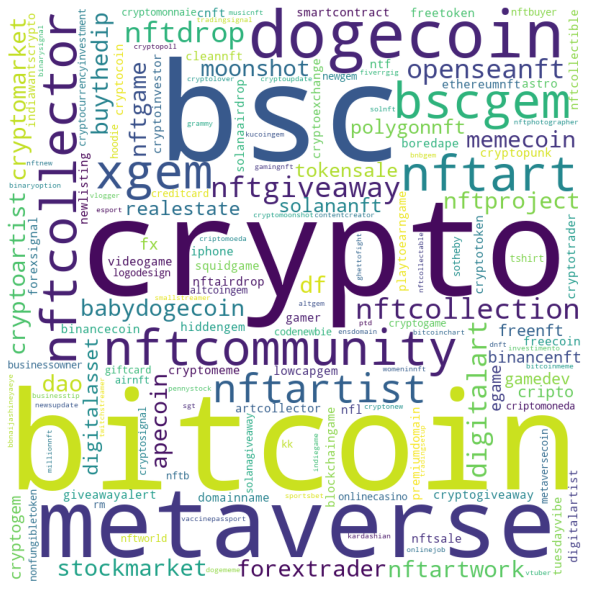

In [24]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)

pos_words = words[words['sentiments'] == 'positive']
 
# # iterate through the csv file
for val in pos_words['words']:
  
  # typecaste each val to string
  val = str(val)
  
  # split the value
  tokens = val.split()
  
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      collocations=False,
                      min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

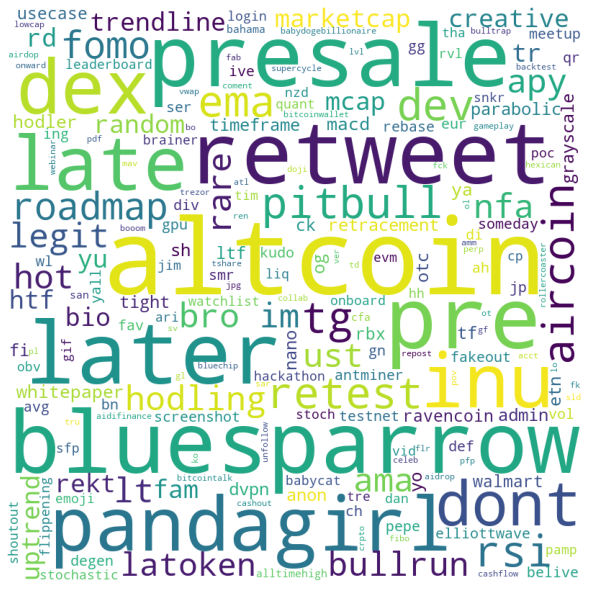

In [25]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)

neg_words = words[words['sentiments'] == 'negative']
 
# # iterate through the csv file
for val in neg_words['words']:
  
  # typecaste each val to string
  val = str(val)
  
  # split the value
  tokens = val.split()
  
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      collocations=False,
                      min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

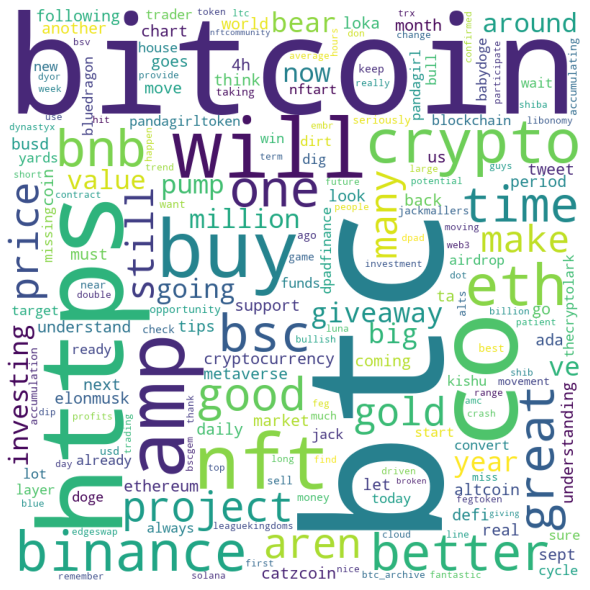

In [21]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)

two_cluster_neg = two_cluster[two_cluster['sentiment'] == 0]
two_cluster_neg = two_cluster_pos.sample(100)
 
# # iterate through the csv file
for val in two_cluster_neg['text']:
  
  # typecaste each val to string
  val = str(val)
  
  # split the value
  tokens = val.split()
  
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      collocations=False,
                      min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()